In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.integrate import quad
from scipy.optimize import root
import simulate_euler

In [110]:
phi = np.tanh

In [112]:
@np.vectorize
def integral(sigma, g, A):
    integrand = lambda z: np.exp(-z**2 / 2) * phi(A + sigma * z)**2
    
    return g**2 / np.sqrt(2*np.pi) * quad(integrand, a=-np.inf, b=np.inf)[0]

In [117]:
def solve_var(g, A, init=1):
    right_side = partial(integral, g=g, A=A)
    left_side = lambda z: z ** 2
    func = lambda z: left_side(z) - right_side(z)
    sol = root(func, x0=init, method='hybr')
    if sol['success']:
        return sol['x'][0] ** 2
    raise ValueError("No solution")

In [118]:
def run_calcs(N, g, A):
    J = np.random.normal(loc=0, scale=g/np.sqrt(N), size=(N,N))
    x0 = np.zeros(N)
    dt = 0.01
    T = 20
    x_dot = lambda x: -x + J.dot(phi(x)) + A
    
    xt = simulate_euler.simulate(x_dot, x0, dt, T)
    mean = xt[-1, :].mean()
    var_simulated = xt[-1, :].var()
    var_calc = solve_var(g, A)
    
    def normal(x, mean, var):
        return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(x - mean)**2 / (2 * var))

    _, x_buckets, _ = plt.hist(xt[-1, :], 50, density=True)
    plt.plot(x_buckets, normal(x_buckets, mean, var_simulated), label="Simulated")
    plt.plot(x_buckets, normal(x_buckets, A, var_calc), label="Theoretical")
    plt.title("Distribution of neuron values")    
    plt.legend()
    plt.show()

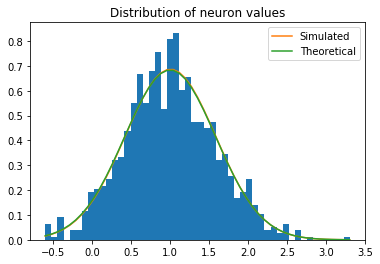

In [119]:
run_calcs(N=1000, g=0.8, A=1)

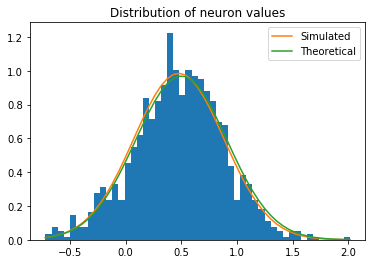

In [120]:
run_calcs(N=1000, g=0.8, A=0.5)